Reinforcement Learning
- model learns how to behave after performing actions and seeing results, adjusting itself, and then trying again

Decision Trees are tree shaped algorithms used to determine course of action, each brance of tree represents possible occurence or reaction
- If decision n returns a and b, check case a, which returns a and b, and so on
- Optimized when information gain is maximized
- Formula for entropy:
    - $$I(p,n) =  -\frac{p}{p + n} * log_2(\frac{p}{p + n}) - \frac{n}{p + n} * log_2(\frac{n}{p + n})$$
- In this case, p and n represent frequency of two outcomes p and n 
- Information Gain = Entropy(original dataset) - Entropy(original dataset that is now optimized)

Support Vector Machines
- algorithm creates a separation line which divides two classes of data in best possible manner
- when more than 2 parameters, it become snecessary to utilize 3 dimensional space in order to classify this data

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [39]:
recipes = pd.read_csv('/Users/aadrijupadya/Downloads/renthop_train.json')
recipes = recipes.drop([20,21,22,23,24])
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


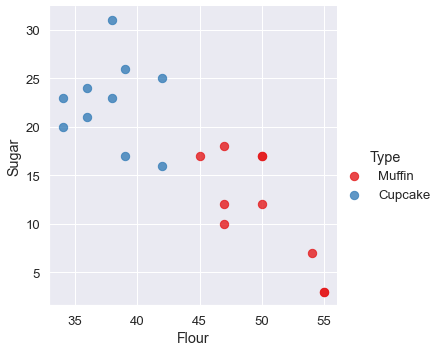

In [40]:
sns.lmplot(x='Flour',y='Sugar',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70});

In [43]:
type_label = np.where(recipes['Type']=='Muffin',0,2)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [44]:
# fit model, svc is a classifier
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [46]:
# set the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot parallels to the separating hyperplane that pass through support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

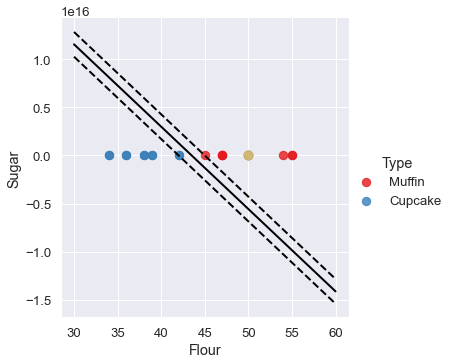

In [51]:
sns.lmplot(x='Flour',y='Sugar',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70});
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--',linewidth=2,color='black')
plt.plot(xx,yy_up,'k--',linewidth=2,color='black')
plt.plot(50,20,'yo',markersize='9')

In [50]:
# predicting function
def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]])) == 0:
        print('Muffin')
    else:
        print('Cupcake')
muffin_or_cupcake(50,20)

Muffin


Clustering and Logistic Regression

Clustering: organizing objects into groups based on similarity

K-Means Clustering is an example of Unsupervised learning --> unlabeled data --> find clusters in data based on feature similarity

Algorithm Logic
1. Pick 'K' clusters and assign random centroids to clusters.
2. Then, we compute distance from objects to centroids
3. Form new clusters based on minimum distance from centroids.
4. Repeat previous two steps iteratively till cluster centroids stop changing their positions, alrgorithm is static and has converged


Elbow Method
- WSS: sum of squared distance between each member of cluster and centroid
- Elbow point (place where cluster dips largely) is the k value we use